In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = []
labels = []

path = r"C:\Users\Home\Documents\gptintern\Deep Learning\01_mnist_classifier\brain_tumor_dataset"
categories = ["yes", "no"]

for category in categories:
    folder = os.path.join(path, category)
    label = 1 if category == "yes" else 0

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (150, 150))
        data.append(img)
        labels.append(label)

# Convert to arrays
X = np.array(data).reshape(-1, 150, 150, 1) / 255.0
y = to_categorical(np.array(labels))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=16)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 509ms/step - accuracy: 0.6854 - loss: 0.7288 - val_accuracy: 0.7619 - val_loss: 0.4779
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.8256 - loss: 0.4678 - val_accuracy: 0.9524 - val_loss: 0.3704
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.8265 - loss: 0.3700 - val_accuracy: 0.9048 - val_loss: 0.3374
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.8707 - loss: 0.3030 - val_accuracy: 0.9048 - val_loss: 0.3255
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - accuracy: 0.9174 - loss: 0.1740 - val_accuracy: 0.8571 - val_loss: 0.3203
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.9673 - loss: 0.1007 - val_accuracy: 0.9048 - val_loss: 0.2359
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.9648 - loss: 0.0883 - val_accuracy: 0.9048 - val_loss: 0.1933
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step - accuracy: 0.9641 - loss: 0.0873 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted: No Tumor


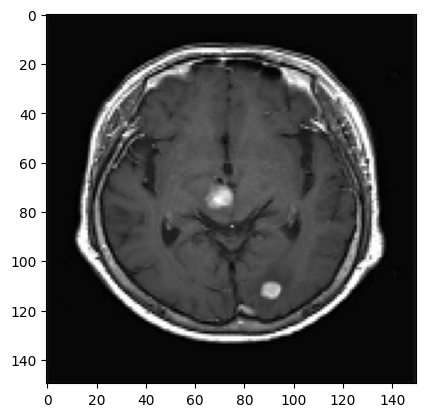

In [2]:
plt.imshow(X_test[0].reshape(150,150), cmap='gray')
pred = model.predict(np.expand_dims(X_test[0], axis=0))
print("Predicted:", "Tumor" if np.argmax(pred) == 1 else "No Tumor")


In [11]:
model.save_weights("model.weights.h5")


In [12]:
model.save("brain_tumor_model.keras")
